# **FOOD DELIVERY TIME PREDICTION**

##  INTRODUCTION

In recent years, the online food delivery industry has experienced exponential growth, driven by consumer demand for convenience and the rise of digital platforms. The efficiency and speed of food delivery are critical factors influencing customer satisfaction and the overall success of food delivery businesses.

For that, we are going to build a food delivery time prediction model. However, of course the timeliness required in delivering food to the customer's place is the main challenge in this service. Accuracy time in delivering the food must be shown to keep transparency with their customers. So, by using historical data on the time it takes to deliver food, the use of machine learning algorithms is one way to predict the accuracy of the time needed to deliver food to location.

## OBJECTIVES



*  What factors can affect the time in delivering food from the restaurant to the destination location?

*   To develop  a machine learning model to predict the accuracy of the food delivery time.







## DATA STORY

In this project, we aim to predict the delivery time for food orders based on various factors impacting the delivery process. The dataset, which includes approximately 45,593 records, contains information about food deliveries made across different cities, detailing environmental conditions, delivery agent characteristics, and order specifics.

## DATASET OVERVIEW

Source: https://drive.google.com/file/d/1EOv4RXw2fVBNSamdOJi4w5mA68PrcrJ6/view?usp=drive_link

Content: This dataset captures a variety of features, including order details, weather, traffic conditions, and delivery location coordinates.

## DATA STRUCTURES AND FEATURES DETAILS

The dataset consists of 20 columns, with each row representing a unique delivery instance. Key columns include:

**Delivery and Order Metadata:**

**ID, Delivery_person_ID:** Unique identifiers for each delivery and delivery person.

**Order_Date, Time_Orderd, Time_Order_picked:** Date and timestamps for order placement and pickup.

**Geolocation Information:**

**Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude:** Latitude and longitude coordinates of restaurant and delivery location.
Agent and Environmental Features:

**Delivery_person_Age, Delivery_person_Ratings:** Delivery person's age and ratings, potentially influencing delivery time.

**Weatherconditions, Road_traffic_density:** Conditions like weather (e.g., sunny, stormy) and traffic density (e.g., low, high) during delivery.

**Vehicle_condition, Type_of_vehicle:** The condition and type of vehicle used by the delivery agent.
Order-Specific Details:

**Type_of_order:** Category of order (e.g., Snack, Buffet).

**multiple_deliveries:** Indicates if multiple deliveries are scheduled with this order.

**Festival, City:** Information about ongoing festivals and the city type (e.g., urban, metropolitan).

**Target Variable:**

**Time_taken(min):** The actual delivery time in minutes, which is our target variable for prediction.

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stat
import pylab as pl
import warnings
# Multicollinearity check library

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Regression algorithm library

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Evaluation metric library

from sklearn.metrics import mean_absolute_error

# Hyperparameter tuning library

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature importance library

import shap

# Save model

import pickle

warnings.filterwarnings('ignore')

### IMPORTING DATASET

In [3]:
#imported dataset
df = pd.read_csv(r"/content/Food_delivery_time_prediction (1).csv")

### EDA

In [4]:
#Checking for the shape od the data

df.shape

(45593, 20)

In [5]:
#Checking for the first few rows of the data

print(f"First few row's of the Dataframe is \n{df.head()}")

First few row's of the Dataframe is 
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date 

In [6]:
#Checking for the first few columns of the data

print(f"List of columns in thr dataframe is:\n{df.columns}")

List of columns in thr dataframe is:
Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [7]:
 #Checking for the Numerical columns in the data

 print(f"Description of the Dataframe of Numerical values is:\n{df.describe()}")

Description of the Dataframe of Numerical values is:
       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45593.000000          45593.000000                45593.000000   
mean             17.017729             70.231332                   17.465186   
std               8.185109             22.883647                    7.335122   
min             -30.905562            -88.366217                    0.010000   
25%              12.933284             73.170000                   12.988453   
50%              18.546947             75.898497                   18.633934   
75%              22.728163             78.044095                   22.785049   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 45593.000000       45593.000000  
mean                     70.845702           1.023359  
std                      21.118812           0.839065  
mi



*   It seems all numerical values contained in the dataset are quite reasonable



In [8]:
#Checking for the Categorical columns in the data

print(f"Description of the Dataframe of Categorical Column is : \n{df.describe(include='O')}")

Description of the Dataframe of Categorical Column is : 
             ID Delivery_person_ID Delivery_person_Age  \
count     45593              45593               45593   
unique    45593               1320                  23   
top     0x4607     PUNERES01DEL01                   35   
freq          1                 67                2262   

       Delivery_person_Ratings  Order_Date Time_Orderd Time_Order_picked  \
count                    45593       45593       45593             45593   
unique                      29          44         177               193   
top                        4.8  15-03-2022        NaN           21:30:00   
freq                      7148        1192        1731               496   

       Weatherconditions Road_traffic_density Type_of_order Type_of_vehicle  \
count              45593                45593         45593           45593   
unique                 7                    5             4               4   
top       conditions Fog          

In [9]:
# General info

print(f"Information of the Data type of the Dataframe : \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [10]:
# Checking for the duplicated data

print(f"Checking for any duplicate rows in the Dataframe : {df.duplicated().sum()}")

Checking for any duplicate rows in the Dataframe : 0


In [11]:
#Checking for the missing values in the data.

print(f"Checking for any missing values in the Dataframe : {df.isnull().sum()}")

Checking for any missing values in the Dataframe : ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64


In [12]:
# Checking for the ratio of the missing value in the data

print(f"The percentage of the missing values in the Dataframe is:\n {(df.isnull().sum()/len(df))*100}")

The percentage of the missing values in the Dataframe is:
 ID                             0.0
Delivery_person_ID             0.0
Delivery_person_Age            0.0
Delivery_person_Ratings        0.0
Restaurant_latitude            0.0
Restaurant_longitude           0.0
Delivery_location_latitude     0.0
Delivery_location_longitude    0.0
Order_Date                     0.0
Time_Orderd                    0.0
Time_Order_picked              0.0
Weatherconditions              0.0
Road_traffic_density           0.0
Vehicle_condition              0.0
Type_of_order                  0.0
Type_of_vehicle                0.0
multiple_deliveries            0.0
Festival                       0.0
City                           0.0
Time_taken(min)                0.0
dtype: float64


In [13]:
# Checking for the ratio of the missing value in the data which are more than 20%.

missingPercentage = (df.isnull().sum()/len(df))*100
print(f"Columns with more than 20% missing values: \n{missingPercentage[missingPercentage>20].keys().tolist()}")

Columns with more than 20% missing values: 
[]




*   There are no missing value and duplicated value in this dataset. However, it is necessary to do more checking for categorical data whether there are unreasonable values or not (There is a blank space, NaN values etc)
For that, we have to clean the data.




*   Dataset consists 43594 rows and 14 columns. Then the dataset also consists of 7 numerical data and 7 categorical data. Out of which some are numerical but stays object because of some blank spaces and NaN values. For that now, we have to clean the data properly.
The problem faced is a regression
problem, namely predicting the time needed to deliver food (Time taken(min)).



### DATA CLEANING

In [14]:
#to convert time_taken column to numeric value
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)','', regex=False)  # Remove 'min'
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)']) # to convert it to numeric format

In [15]:
df['Time_taken(min)'].unique()
#removed (min) and converted every value in time_taken to numerical values

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [16]:
#to convert multiple_deliveries column to numerical value
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')
df['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [17]:
#to convert NaN values in multiple_deliveries to 0
df['multiple_deliveries'].fillna('0.0', inplace=True)
df['multiple_deliveries'] = df['multiple_deliveries'].replace('0.0', 0.0)
df['multiple_deliveries'].unique()


array([0., 1., 3., 2.])

In [18]:
# Convert 'Delivery_person_Age' to numeric
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

In [19]:
# Fill NaN values with the mean of the column
mean_age = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'].fillna(mean_age, inplace=True)

# Convert to integer after filling NaN
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

df['Delivery_person_Age'].unique()# Fill NaN values with the mean of the column
mean_age = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'].fillna(mean_age, inplace=True)

# Convert to integer after filling NaN
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

df['Delivery_person_Age'].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50])

In [20]:
#to convert order_date column to date format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date']

,Order_Date
0,2022-03-19
1,2022-03-25
2,2022-03-19
3,2022-04-05
4,2022-03-26
...,...
45588,2022-03-24
45589,2022-02-16
45590,2022-03-11
45591,2022-03-07


In [21]:
# Convert the time columns to datetime format
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

# Check if conversion was successful
print(df[['Time_Orderd', 'Time_Order_picked']].head())

          Time_Orderd   Time_Order_picked
0 1900-01-01 11:30:00 1900-01-01 11:45:00
1 1900-01-01 19:45:00 1900-01-01 19:50:00
2 1900-01-01 08:30:00 1900-01-01 08:45:00
3 1900-01-01 18:00:00 1900-01-01 18:10:00
4 1900-01-01 13:30:00 1900-01-01 13:45:00


In [22]:
# Convert 'Delivery_person_Ratings' to numeric
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [23]:
df['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [24]:
df['Festival'] = df['Festival'].replace('NaN ', 'No ') # Assuming 'No' means not a festival
df['Road_traffic_density'] = df['Road_traffic_density'].replace('NaN ', 'Low ' )  # Default to 'Low' if NaN
df['Weatherconditions'] = df['Weatherconditions'].replace(' NaN', ' Sunny')  # Default to 'Clear' if NaN
df['Type_of_vehicle'].fillna('Unknown', inplace=True)  # Default to 'Unknown' if NaN
df['City'] = df['City'].replace('NaN ', 'Unknown')

In [25]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [26]:
df['Festival'].unique()

array(['No ', 'Yes '], dtype=object)

In [27]:
df['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [28]:
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions','', regex=False)  # Remove 'conditions'
df['Weatherconditions'].unique()

array([' Sunny', ' Stormy', ' Sandstorms', ' Cloudy', ' Fog', ' Windy',
       ' NaN'], dtype=object)

In [29]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int64         
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            45593 non-null  datetime64[ns]
 11  Weatherconditions            45593 non-nu

### FEATURE ENGINEERING

The time between the Order placed time and order picked time can give the delay caused by the delivery person, which is a factor which affects the food delivery time.

In [31]:
# Calculate time difference in minutes
df['Pickup_delay_minutes'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60.0

# Check the new feature
print(df[['Time_Orderd', 'Time_Order_picked', 'Pickup_delay_minutes']].head())

          Time_Orderd   Time_Order_picked  Pickup_delay_minutes
0 1900-01-01 11:30:00 1900-01-01 11:45:00                  15.0
1 1900-01-01 19:45:00 1900-01-01 19:50:00                   5.0
2 1900-01-01 08:30:00 1900-01-01 08:45:00                  15.0
3 1900-01-01 18:00:00 1900-01-01 18:10:00                  10.0
4 1900-01-01 13:30:00 1900-01-01 13:45:00                  15.0


To get the time needed to deliver food, the distance between the restaurant and the delivery location is needed.To get the required distance, Haversine Formula can be used to calculate the distance between 2 locations by utilizing longitudes and latitudes.


In [32]:
#to find the distance between the restaurant and the delivery location
R = 6371

# Convert degrees to radians

def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula

def dist_calculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points

df['Distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'Distance'] = dist_calculate(df.loc[i, 'Restaurant_latitude'],
                                             df.loc[i, 'Restaurant_longitude'],
                                             df.loc[i, 'Delivery_location_latitude'],
                                             df.loc[i, 'Delivery_location_longitude'])

df['Distance'].unique()

array([3.02514929e+00, 2.01835297e+01, 1.55275780e+00, ...,
       5.89501948e+03, 1.98396068e+01, 1.73407028e+04])

In [33]:
# Remove unneeded columns
df = df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Time_Orderd','Time_Order_picked','Order_Date','Delivery_person_ID'],axis=1)

Since dataset now have distance column, latitudes, longitudes data, time orderd, time order picked and unnecessary columns which will not help in food delivery time prediction like order date and delivery person ID can be dropped.

In [34]:
df = df.drop(['ID'],axis=1)

### HANDLING MISSING VALUES

In [35]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,1908
Weatherconditions,0
Road_traffic_density,0
Vehicle_condition,0
Type_of_order,0
Type_of_vehicle,0
multiple_deliveries,0
Festival,0
City,0


In [36]:
#handling NaN values in these three columns
df.dropna(subset=['Weatherconditions','Pickup_delay_minutes','Delivery_person_Ratings'], inplace=True)

In [37]:
df['Weatherconditions'].unique()

array([' Sunny', ' Stormy', ' Sandstorms', ' Cloudy', ' Fog', ' Windy'],
      dtype=object)

In [38]:
df['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 3.2, 3.3, 3.4, 2.8, 2.9, 3. ])

In [39]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Weatherconditions,0
Road_traffic_density,0
Vehicle_condition,0
Type_of_order,0
Type_of_vehicle,0
multiple_deliveries,0
Festival,0
City,0


In [40]:
def fill_missing_values(df, numericalFeatures='mean', categoricalFeatures='mode'):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:# Fill missing values for numerical columns
        if numericalFeatures == 'mean':
            fill_value = df[col].mean()
        elif numericalFeatures == 'median':
            fill_value = df[col].median()
        else:
            raise ValueError("numericalFeatures must be 'mean' or 'median'")

        df[col].fillna(fill_value, inplace=True)

    for col in df.select_dtypes(include=['object']).columns:# Fill missing values for categorical columns
        if categoricalFeatures == 'mode':
            fill_value = df[col].mode()[0]  # mode returns a Series
        else:
            raise ValueError("categoricalFeatures must be 'mode'")

        df[col].fillna(fill_value, inplace=True)

    return df

df_filled = fill_missing_values(df, numericalFeatures='mean', categoricalFeatures='mode')

print(df_filled.isnull().sum())

Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
Pickup_delay_minutes       0
Distance                   0
dtype: int64


There are no missing value and duplicated value in this dataset.

### OUTLIER TREATMENT

In [41]:
# Group numerical and categorical data

def NumCat(df):
    numericalFeatures = df.select_dtypes(include=['number']).columns.tolist()
    categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()
    return numericalFeatures, categoricalFeatures

numericalFeatures, categoricalFeatures = NumCat(df)

In [42]:
df[numericalFeatures].describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),Pickup_delay_minutes,Distance
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,1.000573,0.727830,26.292127,-17.260403,26.756143
std,5.760689,0.313827,0.816735,0.576768,9.372057,196.015502,299.640228
min,20.000000,2.500000,0.000000,0.000000,10.000000,-1435.000000,1.465067
25%,25.000000,4.500000,0.000000,0.000000,19.000000,5.000000,4.663432
50%,30.000000,4.700000,1.000000,1.000000,26.000000,10.000000,9.220419
75%,35.000000,4.900000,2.000000,1.000000,32.000000,15.000000,13.682165
max,39.000000,5.000000,2.000000,3.000000,54.000000,15.000000,6884.726399


In [43]:
df[categoricalFeatures].describe()

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,43594,43594,43594,43594,43594,43594
unique,6,4,4,3,2,4
top,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,7435,14976,11020,25486,42742,32592


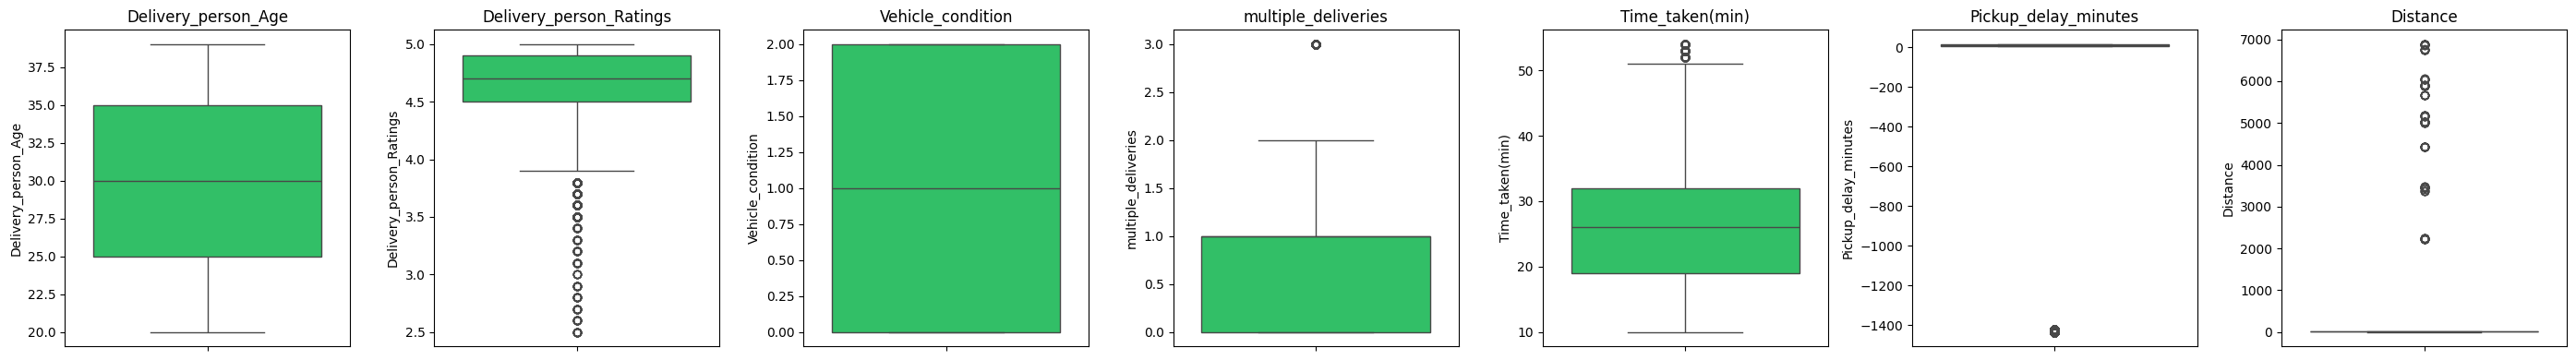

In [44]:
# Detecting outliers using boxplot

plt.figure(figsize=(len(numericalFeatures)*4, 4))
for i in range(0, len(numericalFeatures)):
    plt.subplot(1, len(numericalFeatures), i+1)
    sns.boxplot(y = df[numericalFeatures[i]], color = '#1AD761')
    plt.title(numericalFeatures[i])

plt.tight_layout()
plt.show()

It looks like distance, Pickup_delay_minutes and  delivery_person_ratings has skew data distribution and has extreme outliers (the difference between the mean and the median is relatively large). For outliers will be checked further using boxplot and IQR, then for data distribution will be checked further using histogram

In [45]:
# Check Delivery_person_Ratings, Pickup_delay_minutes distance maximum and minimum value

column = ['Delivery_person_Ratings', 'Distance','Pickup_delay_minutes']

for col in column:
    print('Max value in {a} column is {b}'.format(a=col, b=df[col].max()))
    print('Min value in {a} column is {b}'.format(a=col, b=df[col].min()))
    print('\t')

Max value in Delivery_person_Ratings column is 5.0
Min value in Delivery_person_Ratings column is 2.5
	
Max value in Distance column is 6884.726398933316
Min value in Distance column is 1.4650674052308583
	
Max value in Pickup_delay_minutes column is 15.0
Min value in Pickup_delay_minutes column is -1435.0
	


In [46]:
# Check lower and upper boundary for Delivery_person_Ratings and distance column

for col in column:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_fence = df[col].quantile(0.25) - (IQR * 3)
    upper_fence = df[col].quantile(0.25) + (IQR * 3)
    print('Outliers in {a} column are < {b} or > {c}'.format(a=col, b=lower_fence, c=upper_fence))

Outliers in Delivery_person_Ratings column are < 3.299999999999999 or > 5.700000000000001
Outliers in Distance column are < -22.392764961330716 or > 31.719629364570377
Outliers in Pickup_delay_minutes column are < -25.0 or > 35.0



Extreme outliers at Delivery_person_Ratings column are on lower boundary, meanwhile distance column have extreme outliers in upper boundary.

In [47]:
# Remove outliers based on max value

def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable])

for df1 in [df]:
  df1['Distance'] = max_value(df1, 'Distance', 31.719629364570377)

In [48]:
#Remove outliers based on min value

def min_value(df2, variable, low):
    return np.where(df2[variable]<low, low, df2[variable])

for df2 in [df]:
  df2['Delivery_person_Ratings'] = min_value(df2, 'Delivery_person_Ratings', 3.299999999999999 )

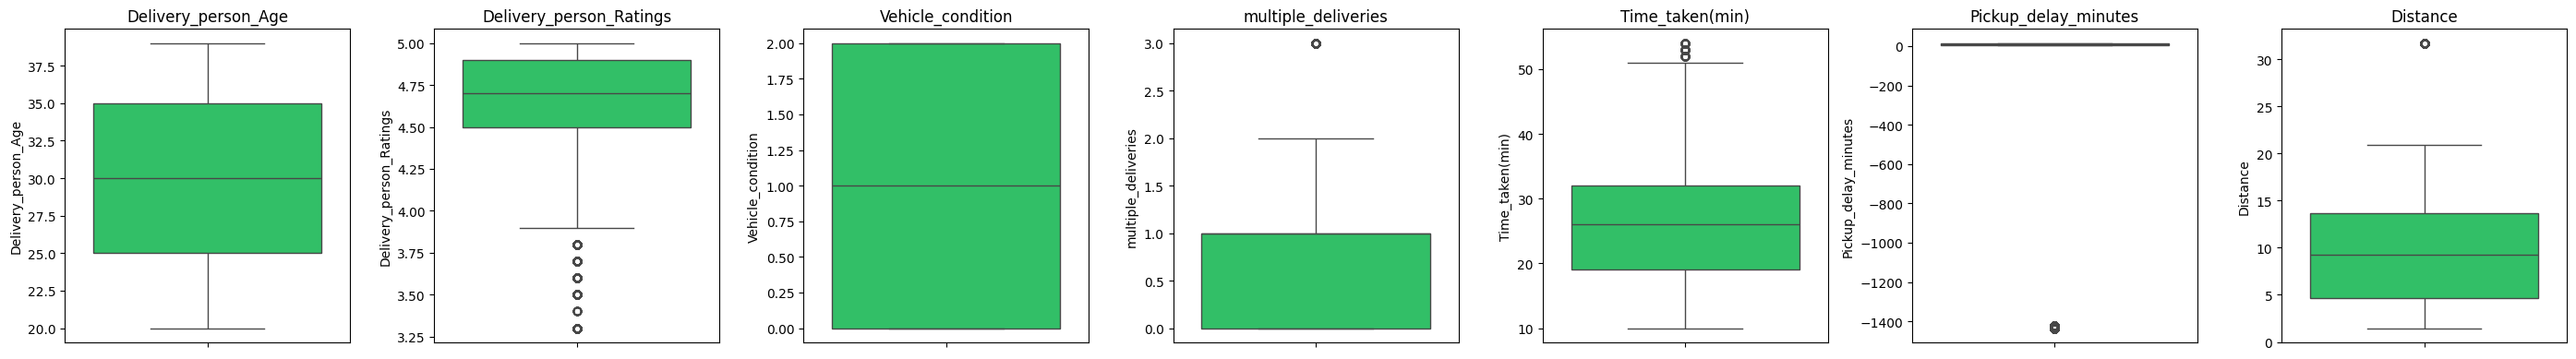

In [49]:
#to check if outliers in Delivery_person_Ratings, Pick_up_delay_minutes and distance

plt.figure(figsize=(len(numericalFeatures)*4, 4))
for i in range(0, len(numericalFeatures)):
    plt.subplot(1, len(numericalFeatures), i+1)
    sns.boxplot(y = df[numericalFeatures[i]], color = '#1AD761')
    plt.title(numericalFeatures[i])

plt.tight_layout()
plt.show()

### UNIVARIATE ANALYSIS

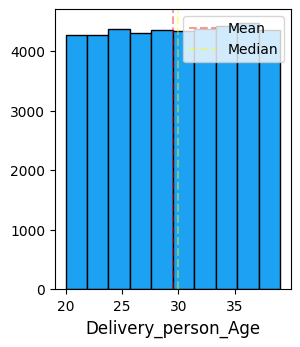

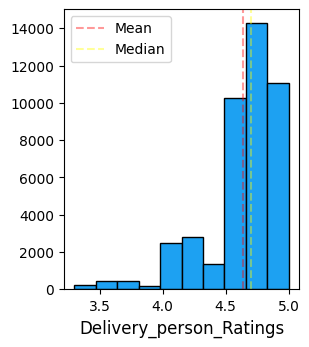

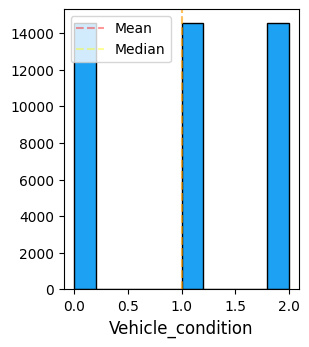

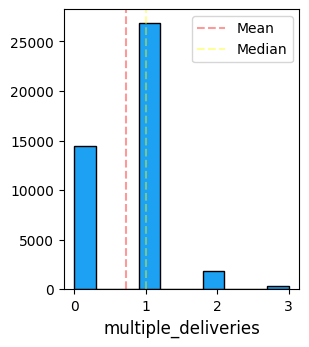

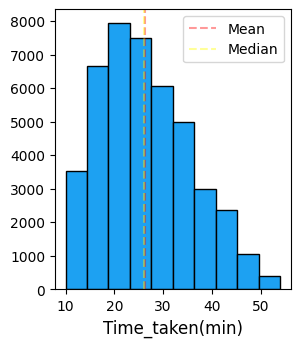

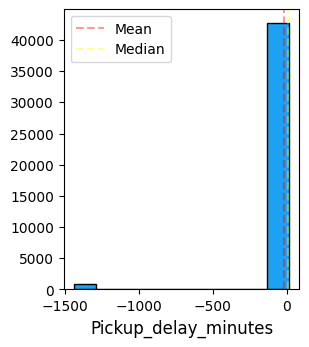

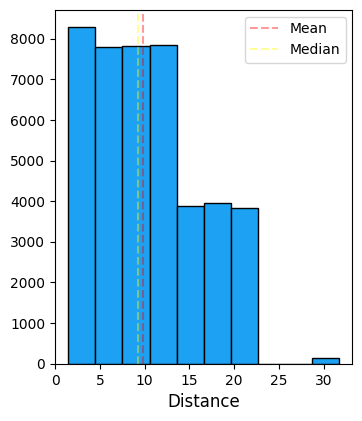

In [50]:
# Data distribution check

for i in range(0, len(numericalFeatures)):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 4, i+1)  # Adjusted to fit 7 items into 2 rows and 4 columns
    plt.hist(df[numericalFeatures[i]], color='#1DA1F2', edgecolor='Black')
    plt.axvline(x=df[numericalFeatures[i]].mean(), ls='--', color='red', alpha=0.4, label='Mean')
    plt.axvline(x=df[numericalFeatures[i]].median(), ls='--', color='yellow', alpha=0.4, label='Median')
    plt.xlabel(numericalFeatures[i], size=12)
    plt.legend()

plt.tight_layout()  # Helps to prevent overlap of the subplots
plt.show()



*   Delivery_person_Ratings has negative skew data distribution, meanwhile distance column has positive skew data distribution
*   Delivery_person_Age and Time_taken(min) column have relatively normal data distribution




### BIVARIATE ANALYSIS

In bivariate analysis, relationships between data features and target (time taken) will be explored.

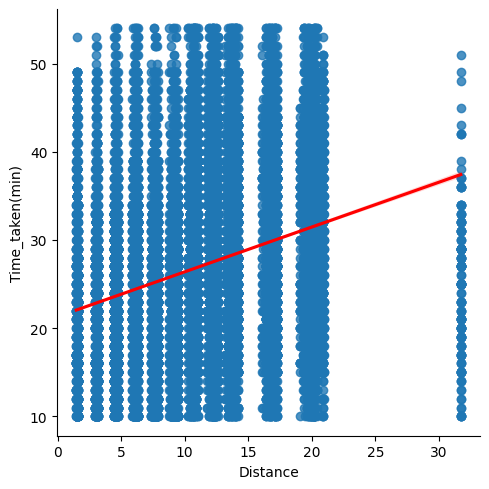

In [51]:
# Relationship between distance with time taken

sns.lmplot(x='Distance', y="Time_taken(min)",
           line_kws={'color': 'red'}, data=df)
plt.show()

There is a linear relationship between the time taken to deliver the food and the Distance between the restaurant and delivery location. It looks like when the distance decreases, the time taken to deliver the food will also decrease.

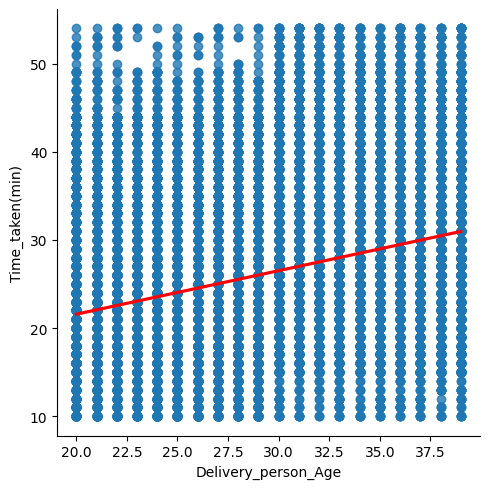

In [52]:
# Relationship between age of the delivery partner with time taken

sns.lmplot(x='Delivery_person_Age', y="Time_taken(min)",
           line_kws={'color': 'red'}, data=df)
plt.show()

There is a linear relationship between the time taken to deliver the food and the age of the person who delivering the food. It looks like person with the young age able to take less time than person with old age to deliver the food to customers.

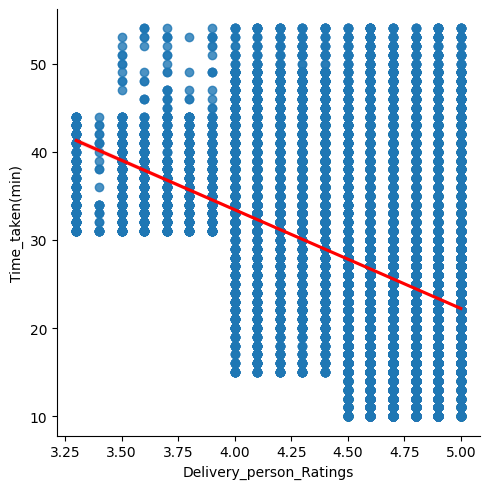

In [53]:
#relationship between rating with time taken

sns.lmplot(x='Delivery_person_Ratings', y="Time_taken(min)",
           line_kws={'color': 'red'}, data=df)
plt.show()

There is an inverse linear relationship between the time taken to deliver the food and the delivery person ratings. It looks like person with the higher ratings take a less time to deliver the food than person with low ratings.

To check if the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not.

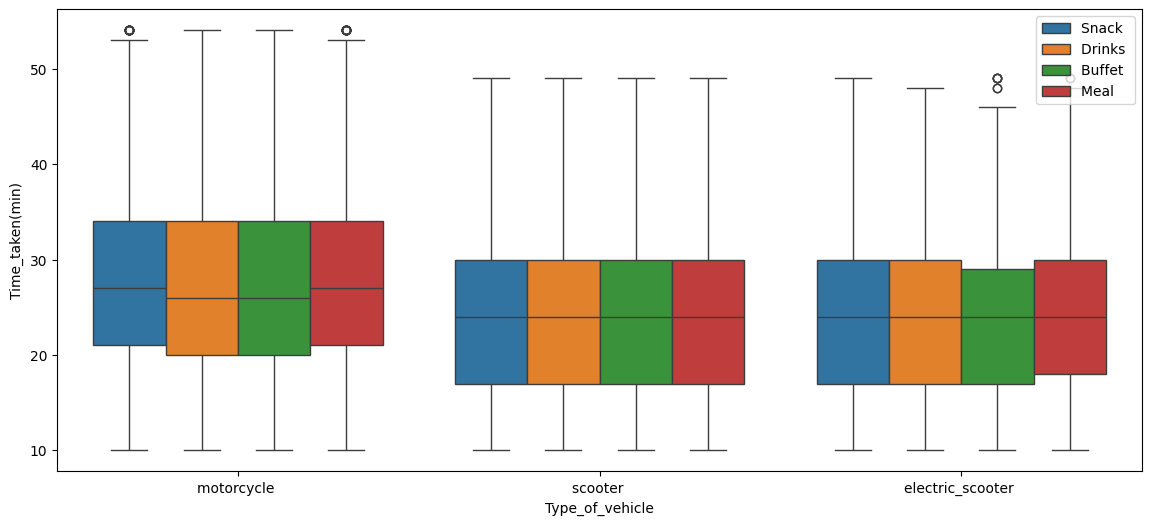

In [54]:
# Boxplot for type of food ordered, type of vehicle, and time taken

plt.figure(figsize=(14,6))
sns.boxplot(x="Type_of_vehicle",
            y="Time_taken(min)", hue="Type_of_order",data=df)
plt.legend(loc='upper right')
plt.show()


It looks like there is not much difference between the time taken depending on the vehicle they are driving and the type of food they are delivering.

### MULTIVARIATE ANALYSIS


In multivariate analysis, Numerical features relationship strengths will be checked by heatmap correlation.

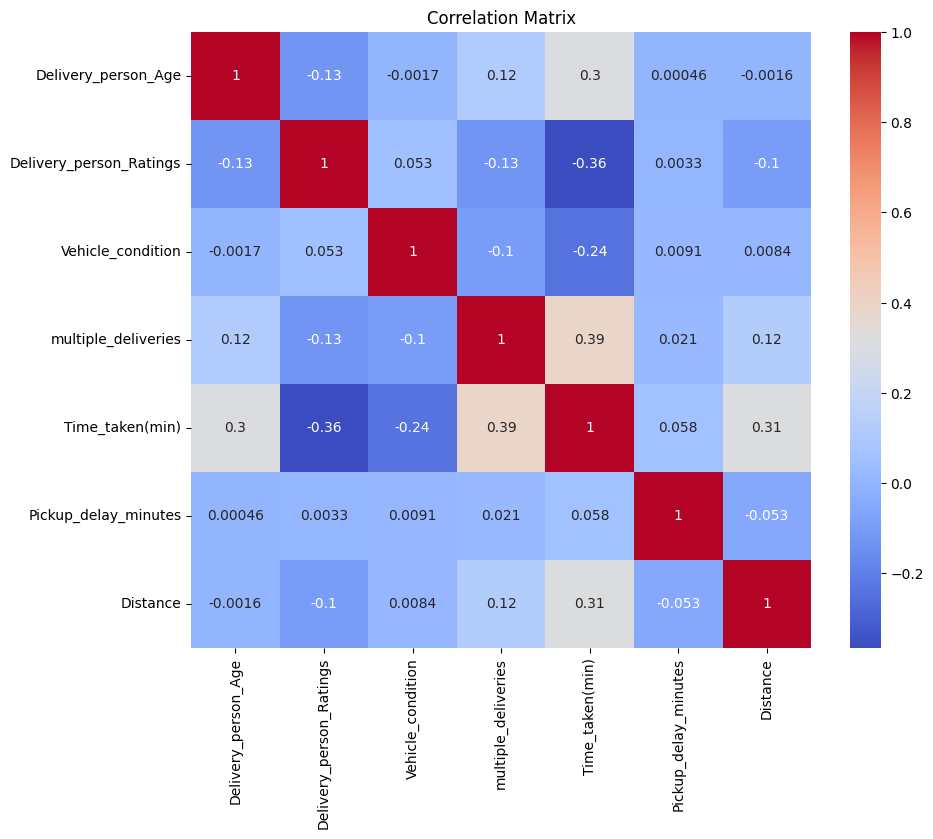

In [55]:
#Compute pairwise correlations between all predictor numerical variables using correlation matrix
correlation_matrix = df[numericalFeatures].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There are no strong correlation between features (correlation < 0.8).The highest correlation with Time_taken(min) column is Delivery_person_Ratings with -0.36 (negative means inverse relationship).



**CONCLUSION:** From the results of the exploratory data analysis that was carried out, it was concluded that the factors that most influence the time of delivering food is ratings of the delivery person with inverse relationship.

### SPLITTING THE DATASET

In [56]:
# Split train-test data into proportion 80:20

X = df.drop(columns='Time_taken(min)')
y = df['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=42)
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (34875, 12)
Test set shape: (8719, 12)


In [57]:
print(y_train)

4122     12
3401     32
42661    21
43092    12
1579     31
         ..
6551     20
11784    38
39915    39
899      28
16479    47
Name: Time_taken(min), Length: 34875, dtype: int64


### ONE HOT ENCODING

Most of the columns which are Categorical data have to transform into numerical data so that it can be used for the modeling.

In [58]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Pickup_delay_minutes,Distance
0,37,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,15.0,3.025149
1,34,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,5.0,20.183530
2,23,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,15.0,1.552758
3,38,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,10.0,7.790401
4,32,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,15.0,6.210138


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43594 non-null  int64  
 1   Delivery_person_Ratings  43594 non-null  float64
 2   Weatherconditions        43594 non-null  object 
 3   Road_traffic_density     43594 non-null  object 
 4   Vehicle_condition        43594 non-null  int64  
 5   Type_of_order            43594 non-null  object 
 6   Type_of_vehicle          43594 non-null  object 
 7   multiple_deliveries      43594 non-null  float64
 8   Festival                 43594 non-null  object 
 9   City                     43594 non-null  object 
 10  Time_taken(min)          43594 non-null  int64  
 11  Pickup_delay_minutes     43594 non-null  float64
 12  Distance                 43594 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 4.7+ MB


In [60]:
# Define individual transformers for preprocessing
trf_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values in Age with the mean
    ('scaler', MinMaxScaler())  # Scale the numerical features
])

In [61]:
trf_categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values in Embarked with the most frequent
    ('label_encoding', OrdinalEncoder()),  # Use OrdinalEncoder for label encoding
    ('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore', dtype=int))  # One-hot encoding
])

In [62]:
# Create the main ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trf_numerical, numericalFeatures),
        ('cat', trf_categorical, categoricalFeatures),
    ],
    remainder='drop'  # Drop any remaining columns (none in this case)
)


In [63]:
# Create the full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Classifier
])

In [64]:
#To check the number columns one Hot encoding has created.

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34875 entries, 4122 to 16479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      34875 non-null  int64  
 1   Delivery_person_Ratings  34875 non-null  float64
 2   Weatherconditions        34875 non-null  object 
 3   Road_traffic_density     34875 non-null  object 
 4   Vehicle_condition        34875 non-null  int64  
 5   Type_of_order            34875 non-null  object 
 6   Type_of_vehicle          34875 non-null  object 
 7   multiple_deliveries      34875 non-null  float64
 8   Festival                 34875 non-null  object 
 9   City                     34875 non-null  object 
 10  Pickup_delay_minutes     34875 non-null  float64
 11  Distance                 34875 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.5+ MB


In [65]:
X_train['Weatherconditions'].unique()

array([' Sunny', ' Stormy', ' Sandstorms', ' Cloudy', ' Fog', ' Windy'],
      dtype=object)

### SCALE NUMERICAL FEATURES

In [66]:
# Create a StandardScaler object and Fit the scaler on the data.

from sklearn.preprocessing import StandardScaler

numerical = ['Time_taken(min)','Pickup_delay_minutes',"Delivery_person_Ratings", "Distance"]

sc = StandardScaler()
df[numerical] = sc.fit_transform(df[numerical])

To address the issue of varying scales in the food delivery dataset, we will perform Standardization. This process involves transforming the features to have a zero mean and a unit standard deviation. By doing so, we ensure that no single feature dominates the learning process and enable a fair comparison among the features.

With the completion of these preprocessing steps, our data is now prepared for training.

### MULTICOLLENIARITY CHECK

In [67]:
# Calculating VIF for each feature.

vif_data = pd.DataFrame()
vif_data['Feature'] = numerical
vif_data['VIF'] = [variance_inflation_factor(df[numerical].values, i)
                   for i in range(len(numerical))]

print(vif_data)

                   Feature       VIF
0          Time_taken(min)  1.272717
1     Pickup_delay_minutes  1.009720
2  Delivery_person_Ratings  1.154677
3                 Distance  1.113735


There are no multicollinearity since the vif score is below than 10.

# MODELING AND EVALUATION

In this step, we will train a machine learning model to predict the food delivery time, which falls under the domain of regression problems since we aim to predict a numerical value. We have a variety of regression algorithms which we can use to build the model, such as Linear Regression, Decision Tree, Random Forest, and XGBoost.

To determine the most suitable algorithm for our data, we can use GridSearchCV. By utilizing this technique, we can explore and identify the algorithm that best fits our model.  GridSearchCV enables us to systematically search through various combinations of algorithms.

In [68]:
# Create rmse calculation

def rmse(targets,predictions):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [69]:
# Load regression algorithms

regressors = [LinearRegression(), Ridge(), Lasso(),
              DecisionTreeRegressor(), RandomForestRegressor()]

regressors

[LinearRegression(),
 Ridge(),
 Lasso(),
 DecisionTreeRegressor(),
 RandomForestRegressor()]

In [70]:
# Create the full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Classifier
])

In [71]:
# Create dataframe for model performance evaluation

df = pd.DataFrame(columns = ['Algorithm', 'RMSE'])

In [72]:
# Model training

for regressor in regressors:
    # Before fitting, convert string columns to numerical using one-hot encoding
    X_train_encoded = pd.get_dummies(X_train, columns=['Weatherconditions','City','Festival','multiple_deliveries','Type_of_vehicle','Type_of_order','Road_traffic_density']) # Assuming these are the string columns
    X_test_encoded = pd.get_dummies(X_test, columns=['Weatherconditions','City','Festival','multiple_deliveries','Type_of_vehicle','Type_of_order','Road_traffic_density']) # Assuming these are the string columns

    # Ensure both training and testing data have the same columns after encoding
    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

    regressor.fit(X_train_encoded, y_train)
    y_pred = regressor.predict(X_test_encoded)
    model = str(type(regressor)).split('.')[-1][:-2]

    # RMSE value

    rmse_value = rmse(y_test, y_pred)

    df = pd.concat([df, pd.DataFrame([{'Algorithm': model, 'RMSE': rmse_value}])], ignore_index=True)

In [73]:
print(X_train_encoded.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'Pickup_delay_minutes', 'Distance', 'Weatherconditions_ Cloudy',
       'Weatherconditions_ Fog', 'Weatherconditions_ Sandstorms',
       'Weatherconditions_ Stormy', 'Weatherconditions_ Sunny',
       'Weatherconditions_ Windy', 'City_Metropolitian ', 'City_Semi-Urban ',
       'City_Unknown', 'City_Urban ', 'Festival_No ', 'Festival_Yes ',
       'multiple_deliveries_0.0', 'multiple_deliveries_1.0',
       'multiple_deliveries_2.0', 'multiple_deliveries_3.0',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'Type_of_order_Buffet ',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Road_traffic_density_High ', 'Road_traffic_density_Jam ',
       'Road_traffic_density_Low ', 'Road_traffic_density_Medium '],
      dtype='object')


In [74]:
X_train = pd.concat([X_train, y_train], axis=1)

In [75]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Time_taken(min)',
                                                   'Pickup_delay_minutes',
                                                   'Distance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label_encoding',
                                                                   OrdinalEncoder()),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>,
                                                                                 handle_unknown='ignore'))]),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival', 'City'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [76]:
# Models evaluation

df

,Algorithm,RMSE
0,LinearRegression,5.911487
1,Ridge,5.911435
2,Lasso,7.860304
3,DecisionTreeRegressor,5.207882
4,RandomForestRegressor,3.821137




*   Based on each RMSE (Root Squared Mean Error) result from 5 trained algorithms, best algorithm is random forest regressor because have the smallest error than other algorithms

*   Performance of the model will try to be improved with hyperparameter tuning





# HYPERPARAMETER TUNING

Hyperparameter tuning using RandomizedSearchCV library.

In [77]:
# Set parameter for tuning

parameters = {'n_estimators': (100, 200, 300),
              'max_depth':(10, 20, 30),
              'bootstrap':(True, False)
             }

rf = RandomForestRegressor()

subsample_size = int(0.2 * X_train_encoded.shape[0])  # Use 20% of the data
X_train_encoded_subset = X_train_encoded.sample(n=subsample_size, random_state=42)
y_train_subset = y_train.loc[X_train_encoded_subset.index]


grid_search_forest = RandomizedSearchCV(rf, parameters, n_iter=10, cv=3, scoring='neg_mean_squared_error',n_jobs=-1, random_state=42)
grid_search_forest.fit(X_train_encoded_subset, y_train_subset)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': (True, False),
                                        'max_depth': (10, 20, 30),
                                        'n_estimators': (100, 200, 300)},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
X_test_encoded = X_test_encoded.apply(pd.to_numeric, errors='coerce')

In [79]:
X_test_encoded = X_test_encoded.astype(int)

In [80]:
# Get the best parameters and estimator

print("Best parameters:", grid_search_forest.best_params_)
print('\n')
print("Best estimator:", grid_search_forest.best_estimator_)

Best parameters: {'n_estimators': 100, 'max_depth': 10, 'bootstrap': True}


Best estimator: RandomForestRegressor(max_depth=10)


In [81]:
# Trained model using best parameter

model = grid_search_forest.best_estimator_
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

# Evaluate tuned model

rmse_value = rmse(y_test, y_pred)
print('RMSE: ', rmse_value)

RMSE:  10.353304420969563


# FEATURE IMPORTANCE

All features will be calculated to check the importance. Higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable. To calculate feature importances, SHAP method will be used.

In [82]:
# Create function

def print_feature_importances_random_forest(random_forest_model):

    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    '''

    # Fetch the feature importances and feature names

    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_

    # Organize them in a dictionary

    feature_importances = {fea: imp for imp, fea in zip(importances, features)}

    # Sorts the dictionary

    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances

    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

In [83]:
# Calculate feature importance score

print_feature_importances_random_forest(model)

Delivery_person_Ratings -> 0.2363
Road_traffic_density_Low  -> 0.1498
Distance -> 0.1332
Delivery_person_Age -> 0.1089
Vehicle_condition -> 0.1028
Weatherconditions_ Sunny -> 0.0961
Weatherconditions_ Cloudy -> 0.0529
Weatherconditions_ Fog -> 0.0523
Road_traffic_density_Medium  -> 0.0195
Road_traffic_density_Jam  -> 0.0080
multiple_deliveries_2.0 -> 0.0071
Festival_Yes  -> 0.0059
multiple_deliveries_3.0 -> 0.0050
Festival_No  -> 0.0050
multiple_deliveries_0.0 -> 0.0044
City_Metropolitian  -> 0.0034
multiple_deliveries_1.0 -> 0.0018
City_Semi-Urban  -> 0.0016
Pickup_delay_minutes -> 0.0009
Weatherconditions_ Windy -> 0.0008
Weatherconditions_ Stormy -> 0.0007
Weatherconditions_ Sandstorms -> 0.0007
City_Urban  -> 0.0005
Type_of_order_Meal  -> 0.0004
Type_of_order_Buffet  -> 0.0004
Type_of_order_Drinks  -> 0.0004
Type_of_order_Snack  -> 0.0003
Type_of_vehicle_electric_scooter  -> 0.0002
City_Unknown -> 0.0001
Type_of_vehicle_scooter  -> 0.0001
Type_of_vehicle_motorcycle  -> 0.0001
Road_

In [84]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 4068 to 21761
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Delivery_person_Age                8719 non-null   int64
 1   Delivery_person_Ratings            8719 non-null   int64
 2   Vehicle_condition                  8719 non-null   int64
 3   Pickup_delay_minutes               8719 non-null   int64
 4   Distance                           8719 non-null   int64
 5   Weatherconditions_ Cloudy          8719 non-null   int64
 6   Weatherconditions_ Fog             8719 non-null   int64
 7   Weatherconditions_ Sandstorms      8719 non-null   int64
 8   Weatherconditions_ Stormy          8719 non-null   int64
 9   Weatherconditions_ Sunny           8719 non-null   int64
 10  Weatherconditions_ Windy           8719 non-null   int64
 11  City_Metropolitian                 8719 non-null   int64
 12  City_Semi-Urban      

In [85]:
# Calculate SHAP values

explainer = shap.Explainer(model.predict, X_test_encoded)
shap_values = explainer(X_test_encoded)

PermutationExplainer explainer: 8720it [31:15,  4.64it/s]


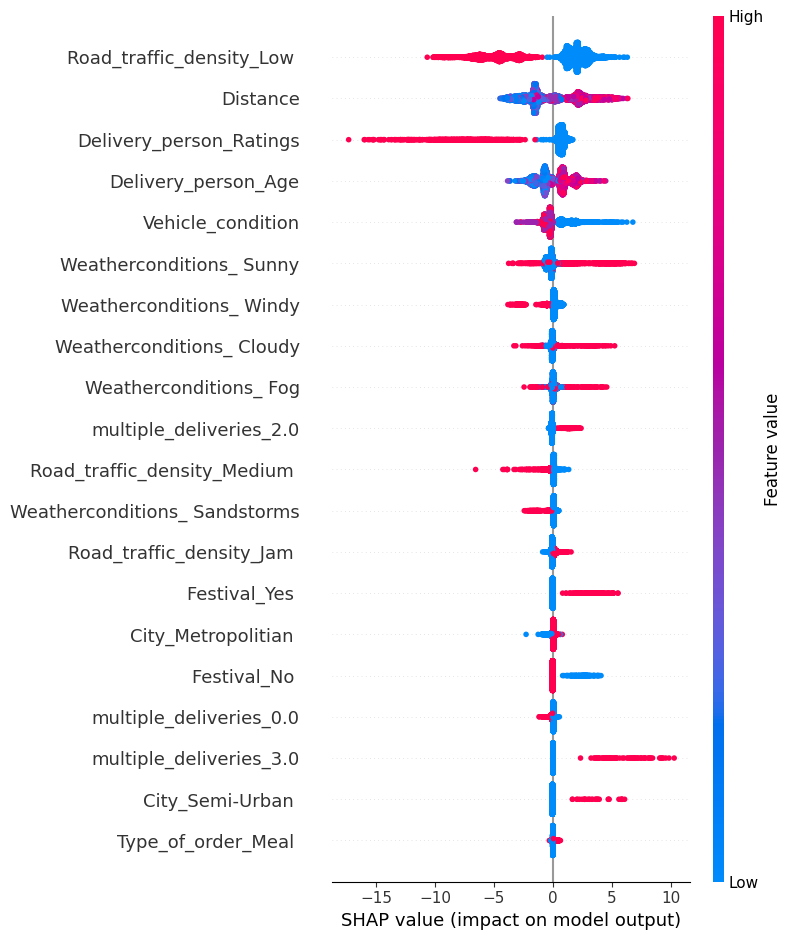

In [86]:
# Feature importance visualization

shap.summary_plot(shap_values)

Delivery_person_Ratings variable become the most importance feature in this model, followed by Distance and Delivery_person_age variables. Then, we can see Delivery_person_Ratings variable has a negative contribution when its values are high, and a positive contribution on low values.

In [87]:
# Save Model

with open('pipeline_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [88]:
with open('pipeline_model.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

# CONCLUSION



*   Rating of person in previous delivers become is the most influential factor on the delivery time of food to the destination location. Person with the higher ratings take a less time to deliver the food than person with low ratings


*   Model has RMSE score 7.28 and that means error between delivery time prediction and delivery time actual is 7.28 minutes




# RECOMMENDATION

The rating obtained by the deliveryman is a representation of the deliveryman's performance in delivering food to the intended location in terms of delivery time. Of course this is a potential loss of customers if this continues to happen. Delivery time performance needs to be maintained so that the rating obtained is high and customer trust can still be maintained. The RMSE value of the model can be used as a guarantee of delivery time performance which can be given to the customer so that as much as possible the delivery time is not more than the existing RMSE score (delay in delivery time of not more than 7.28 minutes).